In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Load UCI HAR dataset
def load_data():
    X_train = pd.read_csv("dataset/train/X_train.txt", delim_whitespace=True, header=None)
    y_train = pd.read_csv("dataset/train/y_train.txt", delim_whitespace=True, header=None)
    X_test = pd.read_csv("dataset/test/X_test.txt", delim_whitespace=True, header=None)
    y_test = pd.read_csv("dataset/test/y_test.txt", delim_whitespace=True, header=None)
    
    return X_train, y_train, X_test, y_test

In [8]:
# Preprocess Data
def preprocess_data():
    X_train, y_train, X_test, y_test = load_data()
    
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Encode target labels
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train.values.ravel())
    y_test = encoder.transform(y_test.values.ravel())

    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test = preprocess_data()
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

C:\Users\deepa\AppData\Local\Temp\ipykernel_37204\3385668847.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("dataset/train/X_train.txt", delim_whitespace=True, header=None)
C:\Users\deepa\AppData\Local\Temp\ipykernel_37204\3385668847.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("dataset/train/y_train.txt", delim_whitespace=True, header=None)
C:\Users\deepa\AppData\Local\Temp\ipykernel_37204\3385668847.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("dataset/test/X_test.txt", delim_whitespace=True, header=None)


Train Shape: (7352, 561), Test Shape: (2947, 561)


C:\Users\deepa\AppData\Local\Temp\ipykernel_37204\3385668847.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv("dataset/test/y_test.txt", delim_whitespace=True, header=None)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train & Evaluate Different ML Models
def train_ml_models():
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
        "Support Vector Machine (SVM)": SVC(kernel='rbf'),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")

    return results

results = train_ml_models()


Logistic Regression Accuracy: 0.9542
K-Nearest Neighbors (KNN) Accuracy: 0.8802
Support Vector Machine (SVM) Accuracy: 0.9522
Random Forest Accuracy: 0.9267


C:\Users\deepa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:54:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Accuracy: 0.9382


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape input for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

# LSTM Model
def train_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
        Dropout(0.2),
        LSTM(32),
        Dense(6, activation='softmax')  # 6 Activity Classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))
    
    return model

lstm_model = train_lstm()


Epoch 1/50


C:\Users\deepa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7026 - loss: 1.0278 - val_accuracy: 0.9277 - val_loss: 0.2087
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1280 - val_accuracy: 0.9355 - val_loss: 0.1839
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.0982 - val_accuracy: 0.9304 - val_loss: 0.1949
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0848 - val_accuracy: 0.9416 - val_loss: 0.1688
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0707 - val_accuracy: 0.9321 - val_loss: 0.2313
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0614 - val_accuracy: 0.9528 - val_loss: 0.1470
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0579 - val_accuracy: 0.9338 - val_loss: 0.2138
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0550 - val_accuracy: 0.9481 - val_

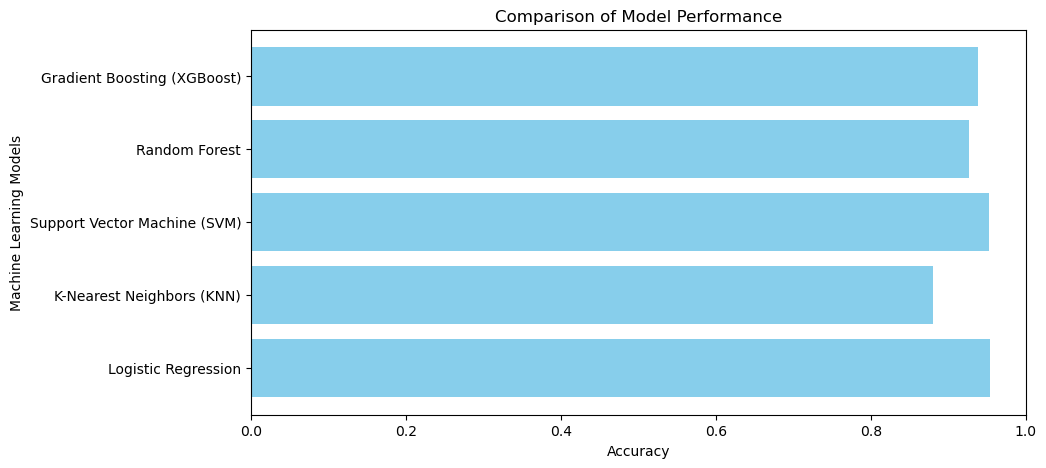

In [32]:
import matplotlib.pyplot as plt

# Compare Model Accuracies
def compare_models(results):
    models = list(results.keys())
    accuracies = list(results.values())

    plt.figure(figsize=(10, 5))
    plt.barh(models, accuracies, color='skyblue')
    plt.xlabel("Accuracy")
    plt.ylabel("Machine Learning Models")
    plt.title("Comparison of Model Performance")
    plt.xlim(0, 1)
    plt.show()

compare_models(results)